In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
golden_df = pd.read_csv('golden_scent_perfumes2.csv')
golden_df = golden_df[golden_df['نوع المنتج'] == 'عطور']

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
golden_df.head()

,الاسم,السعر النهائي,الماركة,الجنس,نوع المنتج,شخصية عطرك,العائلة العطرية,الحجم,سنة الإصدار,نسبة التركيز,...,قاعدة العطر,Category,المكونات,اللون,النوتات العُليا,النوتات المتوسطة,النوتات القاعدية,التركيبة,نوع المكياج,مفتاح البحث
0,كورلوف كوير ميثيك أو دو برفيوم,1116,كورلوف,رجالي/نسائي,عطور,كلاسيكية,جلدية,100 مل,2018,أو دو برفيوم,...,الجلود,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,كالفين كلاين ايفوريا ومن,298,كالفن كلاين,نسائي,عطور,حيوية,فاكهية,50 مل,2005,أو دو برفيوم,...,عنبر ، خشب,عطور,رمان ، لوتس بلوسوم ، بلاك أوركيد ، عنبر ، خشب,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,قراس للعطور عود ذا بالاس أو دو برفيوم - 30 مل,159,قراس للعطور,رجالي/نسائي,عطور,كلاسيكية,جلدية,30 مل,NaN,أو دو برفيوم,...,الجلود، أخشاب الصندل,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ماركو سيروسي هارموني,333,ماركو سيروسي,رجالي,عطور,جذابة,شرقية خشبية,100 مل,NaN,أو دو تواليت,...,باتشولي، نجيل الهند.,NaN,الفلفل الأسود، هيل، كمون، جوزة الطيب، زهر البر...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,لورينزو فيلوريسي أومو,629,لورينزو فيلوريسي فيرنزي,رجالي,عطور,حيوية,أروماتيك,100 مل,1993,أو دو تواليت,...,خشب الصندل، الباتشولي، المسك، نجيل الهند، طحلب...,NaN,أوراق الغار، البتيتغرين، البرغموت، الليمون الأ...,"أزرق,فضي",NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
golden_df.shape

(8143, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [5]:
golden_df.drop(columns=['اللون' , 'النوتات العُليا','مفتاح البحث','نوع المكياج','النوتات القاعدية' ,'النوتات المتوسطة','التركيبة' , 'Category','نوع المنتج'],axis=1 , inplace=True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [6]:
golden_df.duplicated().sum()

2

In [7]:
golden_df.drop_duplicates(inplace=True)

In [8]:
golden_df.duplicated().sum()


0

In [9]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [10]:
#Display number missing values per column

In [16]:
golden_df.isnull().sum().sort_values(ascending = False)

المكونات           3591
سنة الإصدار        3512
قلب العطر          2029
قاعدة العطر        2027
مقدمة العطر        1973
شخصية عطرك          434
العائلة العطرية     432
نسبة التركيز         24
الحجم                18
الماركة               8
الجنس                 2
الاسم                 0
السعر النهائي         0
dtype: int64

In [12]:
df = golden_df.dropna(subset=["المكونات", "العائلة العطرية","شخصية عطرك","نسبة التركيز","الجنس"])


In [13]:
df.fillna("Unknown", inplace=True)

C:\Users\Abood\AppData\Local\Temp\ipykernel_22280\839676283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna("Unknown", inplace=True)


In [17]:
df.isnull().sum().sort_values(ascending = False)

الاسم              0
السعر النهائي      0
الماركة            0
الجنس              0
شخصية عطرك         0
العائلة العطرية    0
الحجم              0
سنة الإصدار        0
نسبة التركيز       0
مقدمة العطر        0
قلب العطر          0
قاعدة العطر        0
المكونات           0
dtype: int64

In [18]:
df.shape

(4241, 13)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=250)  # Limit to the top 250 features for simplicity

# Apply TF-IDF to the 'المكونات' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['المكونات'])

# Convert the TF-IDF matrix to a DataFrame for easier integration
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the resulting TF-IDF DataFrame
tfidf_df.head()


,ci,أبيض,أحمر,أخشاب,أخضر,أرز,أزهار,أسود,أكوا,ألفا,...,والياسمين,وخشب,ورد,وردي,ورق,ياسمين,يلانج,يلانغ,يوجينول,يوسفي
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
tfidf_df.value_counts()

ci        أبيض  أحمر  أخشاب  أخضر  أرز  أزهار  أسود  أكوا      ألفا  أمبروكسان  أوراق  أوسمانثوس  أيونون  إبرة  إكليل  إيثيل     إيزوميثيل  الأبيض    الأحمر  الأخشاب  الأخضر  الأرز  الأزهار  الأسود  الأعشاب  الألدهيدات  الأناناس  الأوركيد  الإيطالي  الإيلنغ  الباتشولي  البارغموت  البحر  البخور  البرالين  البرتقال  البرجموت  البرغموت  البرقوق  البري  البلغاري  البلوط  البنزوين  البنزيل  البنفسج  البودرة  البيضاء   التبغ  التركي  التفاح  التنوب  التوابل  التوت  التونكا  التين  الجاردينيا  الجاوي  الجبل  الجريب  الجلد     الجلود    الحبهان  الحمضيات  الخزامى  الخزامي  الخشب  الخشبية  الخضراء   الخوخ  الدمشقي   الراعي  الروم  الريحان  الزعتر  الزعفران  الزنبق  الزنجبيل  الزهور    السرو  السنديان  السوسن  الشاي  الشمس  الصندل  الصنوبر  الطيب  العرعر  العسل  العليق  العنبر    العود  الغاياك   الفانيلا  الفانيليا  الفاوانيا  الفاونيا  الفراولة  الفريزيا  الفل  الفلفل  الفواكه  القرفة  القرنفل  القهوة  الكاكاو  الكحول  الكراميل  الكرز  الكزبرة  الكشمش  الكشمير  الكمثرى  الكمون  الكومارين  اللا

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
encoded_labels = df[['الجنس', 'شخصية عطرك', 'العائلة العطرية', 'نسبة التركيز']].apply(
    lambda col: label_encoder.fit_transform(col.astype(str))
)


In [24]:
encoded_labels

,الجنس,شخصية عطرك,العائلة العطرية,نسبة التركيز
1,3,10,34,0
3,1,7,30,2
4,1,10,1,2
5,1,14,19,0
7,2,18,29,0
...,...,...,...,...
8135,3,15,21,0
8139,2,19,11,2
8140,2,10,19,0
8141,2,10,1,0


In [25]:
# Reset the indices of both DataFrames to ensure alignment
encoded_labels.reset_index(drop=True, inplace=True)
tfidf_df.reset_index(drop=True, inplace=True)

# Combine the encoded categorical features with the TF-IDF features
final_data = pd.concat([encoded_labels, tfidf_df], axis=1)

# Check for NaN values to ensure no mismatched rows
print(final_data.isnull().sum().sum())  # Should print 0 if there are no NaNs


0


In [26]:
final_data

,الجنس,شخصية عطرك,العائلة العطرية,نسبة التركيز,ci,أبيض,أحمر,أخشاب,أخضر,أرز,...,والياسمين,وخشب,ورد,وردي,ورق,ياسمين,يلانج,يلانغ,يوجينول,يوسفي
0,3,10,34,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7,30,2,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,10,1,2,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,14,19,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,18,29,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4236,3,15,21,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4237,2,19,11,2,0.0,0.0,0.0,0.291809,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4238,2,10,19,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4239,2,10,1,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Step 1: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_data) 

In [42]:
scaled_data

array([[ 1.16560205, -0.40229479,  1.47025586, ..., -0.11578462,
        -0.15060039, -0.10485569],
       [-1.56024207, -1.0863895 ,  1.07016249, ..., -0.11578462,
        -0.15060039, -0.10485569],
       [-1.56024207, -0.40229479, -1.83051441, ..., -0.11578462,
        -0.15060039, -0.10485569],
       ...,
       [-0.19732001, -0.40229479, -0.03009427, ..., -0.11578462,
        -0.15060039, -0.10485569],
       [-0.19732001, -0.40229479, -1.83051441, ..., -0.11578462,
        -0.15060039, -0.10485569],
       [-0.19732001, -0.40229479,  1.47025586, ..., -0.11578462,
        -0.15060039, -0.10485569]])

In [28]:
wcss = []
for i in range(1, 20):  # Test 1 to 20 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

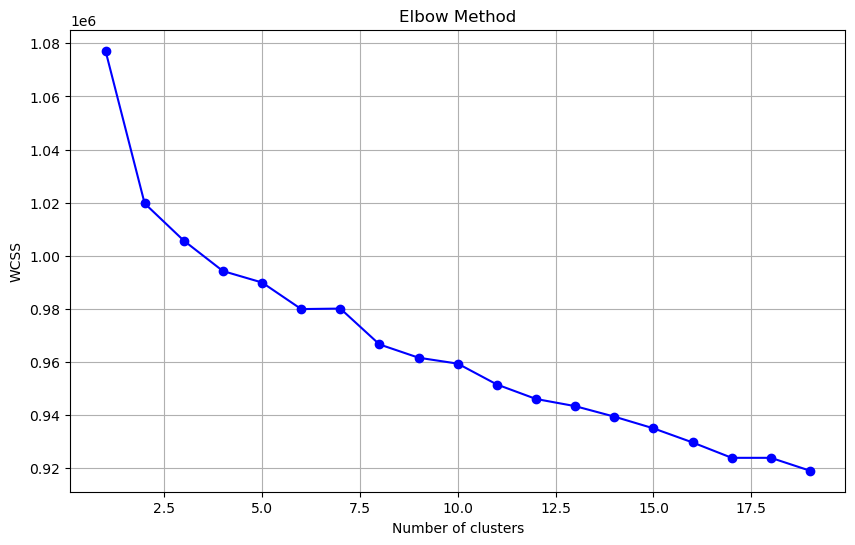

In [29]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Step 1: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_data)  # Scale the data to have mean 0 and standard deviation 1

# Step 2: Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42 )  # Initialize K-means with 5 clusters
kmeans.fit(scaled_data)  # Fit the model to the scaled data

# Step 3: Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_




# Display the clusters
df[['Cluster']].head()


C:\Users\Abood\AppData\Local\Temp\ipykernel_22280\3685030640.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


,Cluster
1,3
3,2
4,2
5,4
7,1


In [31]:
df['Cluster'].value_counts()

Cluster
1    1930
2     838
4     665
3     499
0     309
Name: count, dtype: int64

In [32]:
df[df['Cluster'] == 0]

,الاسم,السعر النهائي,الماركة,الجنس,شخصية عطرك,العائلة العطرية,الحجم,سنة الإصدار,نسبة التركيز,مقدمة العطر,قلب العطر,قاعدة العطر,المكونات,Cluster
29,فيلهلم بارفيوميري فلور بيرلسك أو دو برفيوم,1190,فيلهلم بارفيوميري,نسائي,حسية,زهرية,100 مل,2015,أو دو برفيوم,الجاردينيا، الياسمين,أخشاب الصندل,العنبر,كحول، عطر، أكوا (ماء)، ألفا إيزوميثيل أيونون، ...,0
30,ميزون مايسى فانيلا إلكسير إديشن بلانشي أو دو ب...,779,ميزون مايسى,رجالي/نسائي,متألقة,عربية,100 مل,2020,أو دو برفيوم,الليمون، السكر، الورد التركي، الورد البلغاري,الحلقوم، المسك الأبيض,أخشاب الأرز، الفانيليا,دينات الكحول. (كحول SD 39-C)، عطر (عطر)، أكوا ...,0
57,شانيل لو اكسكلوسيفس دو شانيل 1932 أو دو برفيوم,2437,شانيل,نسائي,حسية,زهرية,200 مل,2013,أو دو برفيوم,البرجموت، النيرولي، الألدهيدات,القرنفل، الورد، الأرجواني، الإيلنغ، الياسمين,البخور، الكومارين، الفانيليا، خشب الصندل، أبوب...,كحول، عطر، أكوا، ماء، لينالول، ليمونين، سيترون...,0
71,بولغاري أليجرا ماجنيفاينج بيرجموت أو دو برفيوم,817,بولغاري,نسائي,ديناميكية,حمضية,40 مل,2021,أو دو برفيوم,Unknown,Unknown,Unknown,دينات الكحول، كحول إس دي 39-ج، أكوا، ماء، عطر،...,0
112,كاندي أديكت لايتس أوف أو دو برفيوم - 50 مل,159,كاندي أديكت,رجالي/نسائي,حيوية,"فاكهية,خشبية",50 مل,Unknown,أو دو برفيوم,Unknown,Unknown,Unknown,الكحول، عطر، ماء، هيدروكسي سيترونيلال، ليمونين...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,فيلهلم بارفيوميري أوبوس كور أو دو برفيوم,690,فيلهلم بارفيوميري,نسائي,حسية,زهرية,50 مل,2015,أو دو برفيوم,الليمون الصقيلي، توت أكاي,توت العليق، الماجنوليا، البنفسج,أخشاب الصندل، المسك، العنبر,دينات الكحول، عطر، أكوا (ماء)، ألفا إيزوميثيل ...,0
8049,فيلهلم بارفيوميري باسيليكو وفليني أو دو برفيوم,1190,فيلهلم بارفيوميري,رجالي/نسائي,محبة للطبيعة,فاكهية,100 مل,2017,أو دو برفيوم,فاكهة التنين، الريحان,التين البري، البنفسج,القش الأخضر، نجيل الهند,ليمونين، ألفا إيزوميثيل أيونون، ألكول أنيسي، س...,0
8064,دالي هوت بارفيومري ما ميوس أو دو برفيوم,1099,دالي هوت برفوميري,نسائي,حسية,زهرية,100 مل,2017,أو دو برفيوم,اللوز، حجر الدم,الياسمين، مسك الروم، أوركيد الفانيليا,مسك الروم,دينات الكحول. عطر؛ مياه أكوا؛ إيثيل هكسيل ميثو...,0
8073,جوتال باريس أو دو سود أو دو تواليت - 50 مل,490,جوتال باريس,رجالي,ديناميكية,حمضية,50 مل,1996,أو دو تواليت,الماندرين، البرجموت، الجريب فروت، الريحان,الياسمين، النعناع، لويزة الليمون، الجير,الباتشولي، نجيل الهند، طحلب البلوط,دينات الكحول.، أكوا (ماء / ماء)، عطر (عطر)، لي...,0


In [33]:
df[df['Cluster'] == 1]

,الاسم,السعر النهائي,الماركة,الجنس,شخصية عطرك,العائلة العطرية,الحجم,سنة الإصدار,نسبة التركيز,مقدمة العطر,قلب العطر,قاعدة العطر,المكونات,Cluster
7,خلطات سلانج,575,خلطات,رجالي/نسائي,متألقة,شرقية,65 مل,Unknown,أو دو برفيوم,الورد,العود,الباتشولي,الورد، الباتشولي، العود,1
26,عطور داتورا مقنوليا أو دو برفيوم,282,عطور داتورا,رجالي/نسائي,رومانسية,زهرية,80 مل,Unknown,أو دو برفيوم,Unknown,Unknown,Unknown,السوسن، الياسمين,1
33,كوتش دريمز - 90 مل,414,كوتش,نسائي,حيوية,فاكهية,90مل,2020,أو دو برفيوم,عصير الكمثرى، البرتقال,البرتقال، الجاردينيا، زهور الصبار,شجرة جوشوا، أمبروكسان,عصير الكمثرى، البرتقال، الجاردينيا، زهور الصبا...,1
34,ليكويد اماجينيرز ديزرت سواف أو دو برفيوم,630,ليكويد اماجينيرز,رجالي/نسائي,رومانسية,زهرية,50 مل,2018,أو دو برفيوم,Unknown,Unknown,Unknown,الورد، البرتقال، الأرز، الهيل، السمسم، زهور ال...,1
36,سويس أربيان كنزي,98,سويس أربيان,رجالي/نسائي,حيوية,فاكهية,100 مل,Unknown,أو دو برفيوم,البرغموت والليمون والبرتقال,رمان ، عنب ، مشمش ، تين,الفانيليا والمسك والعنبر,البرغموت والليمون والبرتقال، رمان ، عنب ، مشمش...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8128,أسطورة العطور تفاصيل أو دو برفيوم,285,أسطورة العطور,رجالي/نسائي,حسية,زهرية,80 مل,Unknown,أو دو برفيوم,Unknown,Unknown,Unknown,الجاردينيا، المسك، البودرة، الزهور.,1
8130,بانافع للعود مشلف أو دو برفيوم,32,بانافع للعود,نسائي,عصرية,زهرية شرقية,100 مل,2019,أو دو برفيوم,Unknown,Unknown,Unknown,اللوتس,1
8140,مونتال داي دريمز,426,مونتال,رجالي/نسائي,حيوية,زهرية,100 مل,2017,أو دو برفيوم,برتقال الماندرين، زهر البرتقال، الياسمين,زهر البرتقال، زهرة تياري، خشب الصندل,الفانيليا، جوز الهند,برتقال الماندرين، زهر البرتقال، زهرة تياري، ال...,1
8141,شكسبير لوفرز كومبلين أو دو برفيوم,569,شكسبير برفيوم,رجالي/نسائي,حيوية,أروماتيك,100 مل,2018,أو دو برفيوم,Unknown,Unknown,Unknown,التوت، فول التونكا، جلد، العنبر,1


In [34]:
df[df['Cluster'] == 2]

,الاسم,السعر النهائي,الماركة,الجنس,شخصية عطرك,العائلة العطرية,الحجم,سنة الإصدار,نسبة التركيز,مقدمة العطر,قلب العطر,قاعدة العطر,المكونات,Cluster
3,ماركو سيروسي هارموني,333,ماركو سيروسي,رجالي,جذابة,شرقية خشبية,100 مل,Unknown,أو دو تواليت,فلفل الأسود، هيل، كمون.,جوزة الطيب، زهر البرتقال، شمام,باتشولي، نجيل الهند.,الفلفل الأسود، هيل، كمون، جوزة الطيب، زهر البر...,2
4,لورينزو فيلوريسي أومو,629,لورينزو فيلوريسي فيرنزي,رجالي,حيوية,أروماتيك,100 مل,1993,أو دو تواليت,أوراق الغار، البتيتغرين، البرغموت، الليمون الأ...,العرعر، المريمية، زهر البرتقال، القرنفل، الفلف...,خشب الصندل، الباتشولي، المسك، نجيل الهند، طحلب...,أوراق الغار، البتيتغرين، البرغموت، الليمون الأ...,2
17,ساينت هيلير برايفت ريد أو دو برفيوم,138,ساينت هيلير,رجالي,حيوية,فاكهية,100 مل,2018,أو دو برفيوم,الليمون,التفاح الأخضر وروائح البحر,العنبر، نجيل الهند، تونكا,الليمون، التفاح الأخضر وروائح البحر، العنبر، ن...,2
19,مارلي كارليسيلي,1662,بارفيوم دو مارلي,رجالي/نسائي,محبة للطبيعة,خشبية,125 مل,2015,أو دو برفيوم,البرغموت، اليوسفي,البنفسج، الياسمين,خشب الغاياك، الباتشولي، الحبهان,البرغموت، اليوسفي، البنفسج، الياسمين، خشب الغا...,2
20,سلفاتوري فيراغامو أومو كاجوال لايف,384,سلفاتوري فيراغامو,رجالي,جذابة,أروماتيك,50 مل,2017,أو دو تواليت,أوراق البنفسج، الليمون، هيل,القهوة، الغرنوقي، أمبروكسيد,أخشاب الكشمير، خشب الأرز الأبيض، المسك الأبيض,أوراق البنفسج، الليمون، هيل، القهوة، الغرنوقي،...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8107,جيفينشي زيريوس,313,جفنشي,رجالي,متألقة,أروماتيك,100 مل,1986,أو دو تواليت,اللافندر، المكونات الخضراء، اليوسفي، البنفسج، ...,بخور مريم، كزبرة، قرنفل، سرو، خشب الصندل، توت،...,الجلود، العنبر، المسك، طحلب السنديان، بلسم الت...,اللافندر، المكونات الخضراء، اليوسفي، البنفسج، ...,2
8110,بوشرون بوشرون,252,بوشرون,نسائي,عصرية,زهرية شرقية,100 مل,1988,أو دو تواليت,الريحان والبرغموت وزهر البرتقال والليمون,إبرة الراعي، السوسن، خشب الصندل، مسك الروم,البنزوين، طحلب البلوط، فول التونكا، الزباد.,الريحان والبرغموت وزهر البرتقال والليمون و إبر...,2
8116,جاغوار بيس اكسيلريت,130,جاكوار,رجالي,ديناميكية,حمضية,100 مل,2017,أو دو تواليت,الهيل، الاخشاب، الماندرين، البرغموت,زنبق الوادي، الفلفل الأبيض، جوزة الطيب، توت ال...,المسك، نجيل الهند,الهيل، الاخشاب، الماندرين، البرغموت، زنبق الوا...,2
8135,مينيز ميموريز بالي أو دو برفيوم - 30 مل,59,مينيز,نسائي,عصرية,زهرية شرقية,30 مل,2019,أو دو برفيوم,فريزيا,المسك,نجيل الهند,فريزيا، المسك، نجيل الهند,2


In [35]:
df[df['Cluster'] == 3]

,الاسم,السعر النهائي,الماركة,الجنس,شخصية عطرك,العائلة العطرية,الحجم,سنة الإصدار,نسبة التركيز,مقدمة العطر,قلب العطر,قاعدة العطر,المكونات,Cluster
1,كالفين كلاين ايفوريا ومن,298,كالفن كلاين,نسائي,حيوية,فاكهية,50 مل,2005,أو دو برفيوم,رمان,لوتس بلوسوم ، بلاك أوركيد,عنبر ، خشب,رمان ، لوتس بلوسوم ، بلاك أوركيد ، عنبر ، خشب,3
60,فيلي آند فيل دات مي إن داون تاون,1052,فيلي أند فيل,رجالي/نسائي,حيوية,فاكهية,100 مل,2010,أو دو برفيوم,تفاح ، زعفران ، خوخ,البرقوق ، زهر البرتقال ، الياسمين,العود ، خشب الصندل ، الفانيليا,،تفاح ، زعفران ، خوخ ،البرقوق ، زهر البرتقال ،...,3
67,مونتال مانجو مانجا,383,مونتال,رجالي/نسائي,حيوية,فاكهية,100 مل,2010,أو دو برفيوم,مانجو، برتقال حلو,ياسمين سامباك، يلنغ يلانغ، زهر البرتقال,عود مغربي، نجيل الهند، خشب أرز، طحلب البلوط,مانجو، برتقال حلو، ياسمين سامباك، يلنغ يلانغ، ...,3
83,نارسيسو رودريغز فلور مسك,326,نارسيسو رودريغز,نسائي,أنثوية,زهرية,30 مل,2017,أو دو برفيوم,زهور، الفلفل,مسك,باتشولي، عنبر,زهور، الفلفل، مسك، باتشولي، عنبر,3
92,جيرلان شاليمار,759,جيرلان,نسائي,رومانسية,أروماتيك,90مل,2011,أو دو برفيوم,برغموت، ليمون، يوسفي، إكليل الجبل,سوسن، ياسمين، ورد، بتشول، نجيل الهند,فانيليا، أبوبوناكس، حبوب التونكا، لبان، خشب ال...,برغموت، ليمون، زهرة يلانغ يلانغ، خوخ، روائح أو...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8086,نارسيسو رودريغيز عود مسك,1001,نارسيسو رودريغز,رجالي/نسائي,كلاسيكية,شرقية خشبية,100 مل,2019,أو دو برفيوم,نكهات حارة، فلفل أسود,مسك,نكهات خشبية، عود، بخور,نكهات حارة، فلفل أسود، مسك، نكهات خشبية، عود، ...,3
8087,إنستانت كوليكشن لا هيور بلانك,669,إنستانت كوليكشن,نسائي,متألقة,شرقية,100 مل,Unknown,أو دو برفيوم,بنفسج، جريب فروت,ياسمين، سوسن، قرفة، قرنفل,باتشولي، مسك، فانيليا، عنبر,بنفسج، جريب فروت، ياسمين، سوسن، قرفة، قرنفل، ب...,3
8096,سيسلي سوار دو لون,820,سيسلي,نسائي,محبة للطبيعة,خشبية,50 مل,2006,أو دو برفيوم,ليمون، برغموت، برتقال، ماندرين، كزبرة، جوزة ال...,الميموزا، الياسمين، زنبق الوادي، الخوخ,موس، مسك، باتشولي، عسل، خشب الصندل,ليمون، برغموت، برتقال، ماندرين، كزبرة، جوزة ال...,3
8122,ألكسندر جي ذا ماجيستك أمبر أو دو برفيوم,690,ألكسندر جي,نسائي,رومانسية,زهرية,100 مل,2020,أو دو برفيوم,جريب فروت، خوخ,الوردة، فول التونكا، دافانا,امبروكسان، الكراميل، الباتشولي، فانيلا,جريب فروت، خوخ، الوردة، فول التونكا، دافانا، ا...,3


In [36]:
df[df['Cluster'] == 4]

,الاسم,السعر النهائي,الماركة,الجنس,شخصية عطرك,العائلة العطرية,الحجم,سنة الإصدار,نسبة التركيز,مقدمة العطر,قلب العطر,قاعدة العطر,المكونات,Cluster
5,توري بورش توري بورش,553,توري برش,رجالي,رومانسية,زهرية,100 مل,Unknown,أو دو برفيوم,"Bergamot, Mandarin, and Lemon","Neroli, Pink Peppercorn, and Peony","Patchouli Heart, Vetiver Heart, and Cedar wood...",البرغموت، اليوسفي، الليمون، زهر البرتقال، الفل...,4
21,جاد خوخ بيتش ريفرز أوف شاينا أو دو برفيوم,249,جاد,رجالي/نسائي,حيوية,فاكهية,100 مل,Unknown,أو دو برفيوم,Unknown,Unknown,Unknown,الخوخ,4
39,شانيل N° 19,699,شانيل,نسائي,رومانسية,زهرية,100 مل,1971,أو دو تواليت,ملاحظات خضراء، البرغموت، زهر البرتقال,ر البرتقال، السوسن، نرجس، الورد، زنبق الوادي، ...,نجيل الهند، خشب الصندل، طحلب البلوط، جلد.,ملاحظات خضراء، البرغموت، زهر البرتقال، السوسن،...,4
52,جاد جرو فانيلا ماريلاين أو دو برفيوم,249,جاد,رجالي/نسائي,حيوية,شرقية ناعمة,100 مل,Unknown,أو دو برفيوم,Unknown,Unknown,Unknown,الفانيليا، الكمثرى، الفريزيا، المسك,4
66,مارينا دو بوربون كريستال رويال,473,مارينا دو بوربون,نسائي,رومانسية,زهرية,100 مل,2016,أو دو برفيوم,الكشمش الأسود، الكمثرى، البرغموت,الياسمين، البنفسج، زنبق الوادي,المكونات الخشبية، المسك، خشب الصندل.,الكشمش الأسود، الكمثرى، البرغموت، الياسمين، ال...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8012,أتكينسونس ذا نوبتيال بوكيت,799,أتكينسونس,نسائي,أنثوية,زهرية ناعمة,100 مل,2013,أو دو تواليت,Unknown,Unknown,Unknown,زنبق الوادي، البنفسج، الآس خشب الصندل، المسك,4
8022,روبرتو كافالي باراديسو أزورو - 75 مل,317,روبرتو كافالي,نسائي,رومانسية,زهرية,75 مل,2015,أو دو برفيوم,نضارة الحمضيات، البرغموت، الخزامى,الياسمين البري، بتلات,السرو، الكشمير.,نضارة الحمضيات، البرغموت، الخزامى، الياسمين ال...,4
8091,اليزابيث تايلور وايت دايموندز نايت,185,إليزابيث تايلور,نسائي,راقية,شرقية خشبية,100 مل,2006,أو دو برفيوم,البارغموت، اليوسفي، المشمش,الياسمين المزهر الليلي، فريزيا,خشب الصندل، المسك، الباتشولي، الراتنجات,البارغموت، اليوسفي، المشمش، الياسمين المزهر ال...,4
8098,أبيركرومبي آند فيتش فرست انستينكت شير أو دو بر...,246,أبيركرومبي آند فيتش,نسائي,رومانسية,زهرية,30 مل,2019,أو دو برفيوم,البرغموت والفلفل الوردي,زهرة البرتقال، الكركديه، زنبق الوادي,المسك، دسم الأخشاب، العنبر,البرغموت والفلفل الوردي، زهرة البرتقال، الكركد...,4


In [37]:
from sklearn.metrics import silhouette_score

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Replace 5 with the desired number of clusters
kmeans.fit(final_data)

# Predict cluster labels
cluster_labels = kmeans.labels_

# Calculate Silhouette Score
silhouette_avg = silhouette_score(final_data, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")
#A general rule of thumb is that a silhouette score above 0.5 indicates a good clustering,
#a silhouette score below 0.25 indicates a bad clustering, and a silhouette score between 0.25 and 0.5 indicates a fair clustering

Silhouette Score: 0.4530548647164948


In [41]:
final_data

,الجنس,شخصية عطرك,العائلة العطرية,نسبة التركيز,ci,أبيض,أحمر,أخشاب,أخضر,أرز,...,والياسمين,وخشب,ورد,وردي,ورق,ياسمين,يلانج,يلانغ,يوجينول,يوسفي
0,3,10,34,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7,30,2,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,10,1,2,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,14,19,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,18,29,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4236,3,15,21,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4237,2,19,11,2,0.0,0.0,0.0,0.291809,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4238,2,10,19,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4239,2,10,1,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [2]:
# check columns types 

In [33]:
# go to clean them 

In [3]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [23]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [24]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [25]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [80]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.